In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import h5py
import os

#%matplotlib nbagg
plt.rcParams.update({"font.size": 12})

In [2]:
data = scipy.io.loadmat('wiens_model_512x512_Temp.mat')

In [3]:
L = 1 # Defining Domain Size

In [4]:
# reading grid locations
x = data['x_plot2'].flatten()
y = data['y_plot2'].flatten()

x += -x.min()
y += -y.min()

x *= L/x.max()
y *= L/y.max()

## Temperature Anomaly

Typical Temperature Anomaly: 0.43008574731318


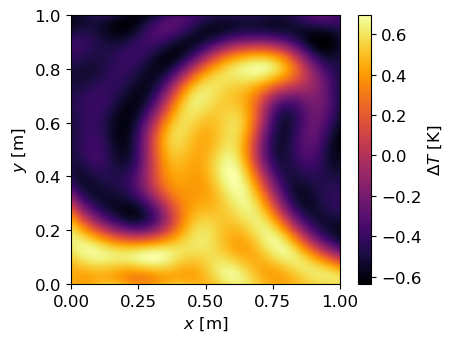

In [5]:
T = data['T_rbf2'].reshape((len(x),len(y)))
T0 = np.mean(T)
DeltaT = (T - T0)



DeltaT0 = np.mean(np.abs(DeltaT))
print('Typical Temperature Anomaly:', DeltaT0)

plt.figure(figsize = (4.5,3.5))
plt.pcolormesh(x, y, DeltaT.T, cmap = 'inferno')
plt.colorbar(label = "$\\Delta T$ [K]")
plt.xlabel("$x$ [m]")
plt.ylabel("$y$ [m]")
plt.gca().set_aspect("equal")

#plt.savefig("../Figures/Wiens_Model.jpg", dpi = 300, bbox_inches = "tight")
plt.show()

In [6]:
v0 = 0.
vx = np.zeros(DeltaT.shape)
vy = np.zeros(DeltaT.shape)

# Non-Zero Flow:
#vx = data['u_rbf2'].reshape((len(x),len(y)))
#vy = data['v_rbf2'].reshape((len(x),len(y)))
#v0 = np.mean(np.sqrt(vx**2 + vy**2))
#v_inc = 20
#plt.figure()
#plt.pcolormesh(x,y,np.sqrt(vx**2 + vy**2).T)
#plt.quiver(x[::v_inc],y[::v_inc], vx[::v_inc,::v_inc].T, vy[::v_inc,::v_inc].T)
#plt.show()

print(f"Typical Temperature Anomaly: {DeltaT0} K")
print(f"Typical Flow Speed: {v0} m/s")

Typical Temperature Anomaly: 0.43008574731318 K
Typical Flow Speed: 0.0 m/s


## Save model as h5-file

In [7]:
# Create an HDF5 file in write mode ('w')
with h5py.File('Wiens.h5', 'w') as f:
    f.create_dataset("x", data = x)
    f.create_dataset("y", data = y)
    f.create_dataset('DeltaT', data = DeltaT)
    f.create_dataset('vx', data = vx[:,:])
    f.create_dataset('vy', data = vy[:,:])
    f.create_dataset('DeltaT0', data = DeltaT0)
    f.create_dataset('v0', data = np.max(np.abs(np.sqrt(vx[:,:]**2 + vy[:,:]**2))))
    f.create_dataset('L', data = L)

In [8]:
x_mesh, y_mesh = np.meshgrid(x, y)

In [9]:
# Create an HDF5 file in write mode ('w') - export for Straight-ray folder
SR_folder = "../SRI_Export/"
if not os.path.exists(SR_folder):
    os.makedirs(SR_folder)
    print(f"Folder '{SR_folder}' created.")
    
with h5py.File(f'{SR_folder}Wiens_flattened.h5', 'w') as f:
    f.create_dataset("x", data = x_mesh.flatten())
    f.create_dataset("y", data = y_mesh.flatten())
    f.create_dataset("z", data = np.zeros(np.shape(x_mesh.flatten())))
    f.create_dataset('DeltaT', data = DeltaT.T.flatten())
    f.create_dataset('vx', data = vx[:,:].T.flatten())
    f.create_dataset('vy', data = vy[:,:].T.flatten())

Folder '../SRI_Export/' created.
